In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import tensorflow as tf

In [5]:
df = pd.read_csv('./datafiles/pima-indians-diabetes.csv', header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# diabetes 여부를 판별하는 모델을 만들고, 모델을 평가

In [43]:
x = df.iloc[:,:8]
y = df.iloc[:,8]

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_sc = scaler.fit_transform(x)

In [45]:
y_oh = pd.get_dummies(y)

In [46]:
x_sc.shape

(768, 8)

In [47]:
y_oh.shape

(768, 2)

In [53]:
model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
# model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               1152      
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trai

In [55]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [56]:
hist = model.fit(x_sc, y, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.6336 - val_loss: 0.6450 - val_accuracy: 0.6429
Epoch 2/100
62/62 [==============================] - 0s 1ms/step - loss: 0.6374 - accuracy: 0.6645 - val_loss: 0.5982 - val_accuracy: 0.6688
Epoch 3/100
62/62 [==============================] - 0s 1ms/step - loss: 0.6026 - accuracy: 0.6824 - val_loss: 0.5866 - val_accuracy: 0.6494
Epoch 4/100
62/62 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.7036 - val_loss: 0.5337 - val_accuracy: 0.7338
Epoch 5/100
62/62 [==============================] - 0s 1ms/step - loss: 0.5557 - accuracy: 0.7296 - val_loss: 0.5318 - val_accuracy: 0.7922
Epoch 6/100
62/62 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.7410 - val_loss: 0.4825 - val_accuracy: 0.8117
Epoch 7/100
62/62 [==============================] - 0s 1ms/step - loss: 0.5227 - accuracy: 0.7443 - val_loss: 0.4818 - val_accuracy: 0.7662
Epoch 8/100
6

Epoch 59/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8013 - val_loss: 0.5157 - val_accuracy: 0.7792
Epoch 60/100
62/62 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8208 - val_loss: 0.5179 - val_accuracy: 0.7792
Epoch 61/100
62/62 [==============================] - 0s 1ms/step - loss: 0.3725 - accuracy: 0.8127 - val_loss: 0.5285 - val_accuracy: 0.7987
Epoch 62/100
62/62 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8274 - val_loss: 0.5161 - val_accuracy: 0.7857
Epoch 63/100
62/62 [==============================] - 0s 1ms/step - loss: 0.3802 - accuracy: 0.8257 - val_loss: 0.5118 - val_accuracy: 0.7987
Epoch 64/100
62/62 [==============================] - 0s 1ms/step - loss: 0.3871 - accuracy: 0.8111 - val_loss: 0.5651 - val_accuracy: 0.7403
Epoch 65/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4042 - accuracy: 0.8046 - val_loss: 0.4971 - val_accuracy: 0.8052
Epoch 

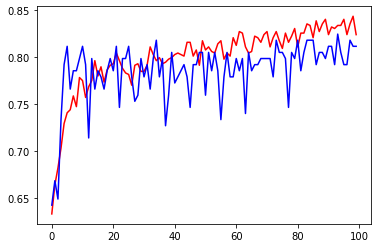

In [57]:
plt.plot(hist.history['accuracy'], c='r')
plt.plot(hist.history['val_accuracy'], c='b')

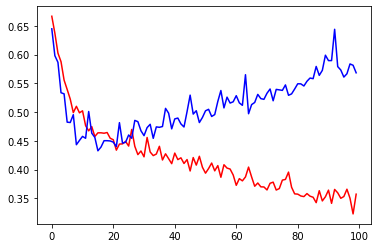

In [58]:
plt.plot(hist.history['loss'], c='r')
plt.plot(hist.history['val_loss'], c='b')

In [59]:
preds = model.predict(x_sc)

In [60]:
model.evaluate(x_sc, y)

24/24 [==============================] - 0s 824us/step - loss: 0.3665 - accuracy: 0.8529


[0.366451621055603, 0.8528645634651184]